# DETECCIÓN DE EMOCIONES POR MEDIO DE EXPRESIONES FACIALES (FER) 



Se hace en primer lugar la importación de las librerías que se van a emplear el en código

In [14]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
!pip install --user seaborn
import seaborn as sns
!pip install tensorflow
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install opencv-python
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

In [3]:
import os
!python --version
os.getcwd()

Python 3.10.9


'/Users/macbook/Documents/ESPECIALIZACIÓN/2do SEMESTRE/INTELIGENCIA ARTIFICIAL/Proyecto'

Ahora se leen los directorios a los datos de entrenamiento y de prueba, **ya pretratados**

In [4]:
train_dir = './archive/train' 
test_dir = './archive/test'   

img_size = 48 

Se aplican transformaciones y aumentos de datos como rotación, desplazamiento, volteo y zoom a las imágenes de entrenamiento, mientras que solo se aplica el reescalado a las imágenes de validación. 

In [5]:
train_datagen = ImageDataGenerator(rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

Se configuran generadores de flujo de datos cargar las imágenes de entrenamiento y validación. 

Se generan lotes de imágenes redimensionadas y preprocesadas en cada iteración o *epoch* del entrenamiento y la validación del modelo. 

Esto facilita la alimentación continua de datos al modelo sin tener que cargar todas las imágenes en memoria al mismo tiempo.

In [6]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 24495 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


Aqui se crea un **modelo secuancial**, su arquitectura incluye **capas convolucionales** que aplican filtros a las imágenes de entrada y utilizan la función de activación *ReLU* para introducir no linealidad. También se utilizan capas de *maxpooling* para reducir la dimensionalidad de las características extraídas. Se añaden *capas de normalización* por lotes para estabilizar el entrenamiento y capas de *dropout* para regularizar el modelo y prevenir el sobreajuste. El modelo se compila con el optimizador Adam y se utiliza la función de pérdida de entropía cruzada categórica para la clasificación multiclase. 

In [7]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))


model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

epochs = 25
batch_size = 64
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

Se ajusta el modelo a los datos de entrenamiento a lo largo de un número específico de épocas (5 y 25 para este trabajo). Durante el entrenamiento, se optimizan los pesos y los sesgos del modelo para minimizar la función de pérdida. Además, se evalúa el rendimiento del modelo en el conjunto de validación después de cada época. La información sobre el progreso y las métricas de rendimiento se registra en la variable *history*, que puede utilizarse para análisis y visualizaciones posteriores.

In [9]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/25
383/383 [==============================] - 1651s 4s/step - loss: 9.3329 - accuracy: 0.1725 - val_loss: 8.8747 - val_accuracy: 0.2304
Epoch 2/25
383/383 [==============================] - 1705s 4s/step - loss: 8.2384 - accuracy: 0.1925 - val_loss: 7.6024 - val_accuracy: 0.1858
Epoch 3/25
383/383 [==============================] - 1689s 4s/step - loss: 7.1322 - accuracy: 0.2239 - val_loss: 6.6013 - val_accuracy: 0.1899
Epoch 4/25
383/383 [==============================] - 1755s 5s/step - loss: 6.0862 - accuracy: 0.2372 - val_loss: 5.9729 - val_accuracy: 0.1446
Epoch 5/25
383/383 [==============================] - 1714s 4s/step - loss: 5.1541 - accuracy: 0.2492 - val_loss: 4.9286 - val_accuracy: 0.2011
Epoch 6/25
383/383 [==============================] - 1886s 5s/step - loss: 4.3424 - accuracy: 0.2576 - val_loss: 4.4606 - val_accuracy: 0.1969
Epoch 7/25
383/383 [==============================] - 1802s 5s/step - loss: 3.7185 - accuracy: 0.2609 - val_loss: 3.5194 - val_accuracy:

Se generan gráficas para visualizar la precisión y la pérdida del modelo durante el entrenamiento y la validación a lo largo de las épocas.

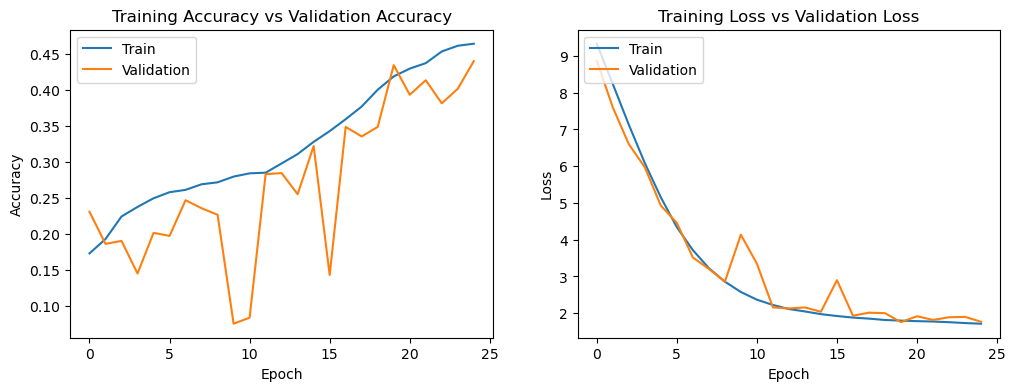

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

Se guarda el modelo en un archivo **FER.h5**, se carga el modelo entrenado, se realiza predicciones en el conjunto de prueba, se calcula y visualiza la matriz de confusión para evaluar el rendimiento del modelo en la clasificación de las clases específicas: 'Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'

23/23 [==============================] - 26s 1s/step


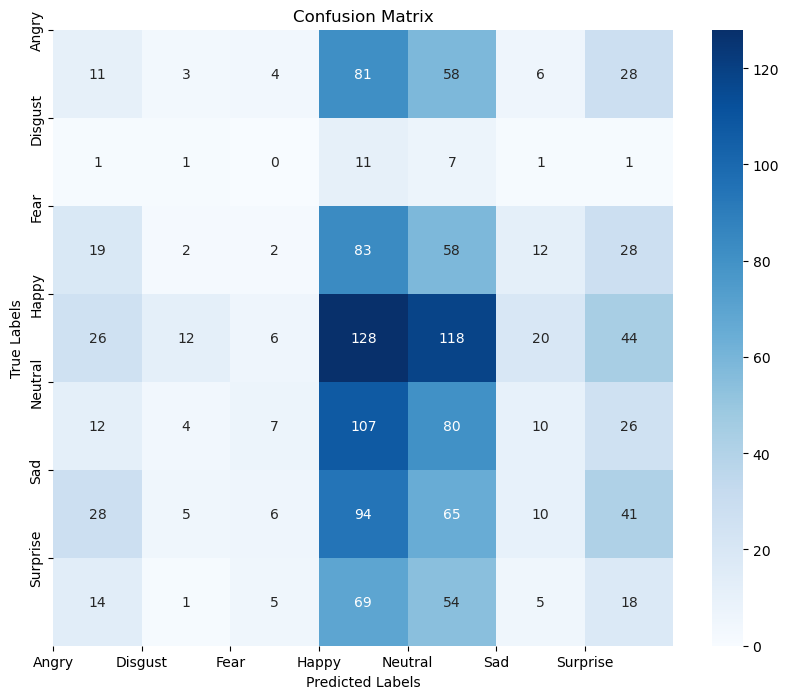

In [15]:
model.save('FER.h5')

model = load_model('FER.h5')

# Obtener las predicciones del conjunto de prueba
y_pred = model.predict(validation_generator)

# Obtener las etiquetas reales del conjunto de prueba
y_true = validation_generator.classes

# Convertir las predicciones en etiquetas predichas (clases)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Nombres de las clases
class_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(class_names)), [class_names[i] for i in range(len(class_names))])
plt.yticks(np.arange(len(class_names)), [class_names[i] for i in range(len(class_names))])
plt.show()


Aqui se define una función (predict_emotion) que carga un modelo entrenado, lee y procesa una imagen, realiza una predicción de la emoción en la imagen y muestra la imagen junto con la etiqueta de emoción predicha.

In [18]:
import cv2

def predict_emotion(image_path):
    label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


    model = tf.keras.models.load_model('FER.h5')
    
    img = cv2.imread(image_path)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir la imagen a formato RGB
    
    plt.imshow(img)
    print(img.shape)
    
    img = cv2.resize(img, (48, 48))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convertir la imagen a escala de grises
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    
    result = model.predict(img)
    result = list(result[0])
    print(result)
    
    img_index = result.index(max(result))
    print(label_dict[img_index])
    plt.show()

(450, 600, 3)
1/1 [==============================] - 0s 298ms/step
[0.0, 0.0, 1.6064156e-25, 0.0, 0.0, 0.0, 1.0]
Surprise


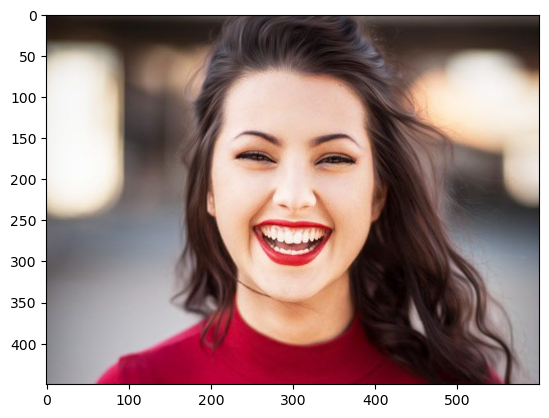

In [19]:
predict_emotion('./Pruebas/Foto_prueba.jpeg')

(3088, 1737, 3)
1/1 [==============================] - 0s 271ms/step
[0.0, 0.0, 0.9999647, 0.0, 0.0, 0.0, 3.527273e-05]
Fear


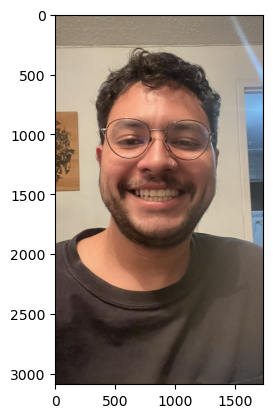

In [20]:
predict_emotion('./Pruebas/IMG_9289.png')

Se evalúa el modelo entrenado en los conjuntos de entrenamiento y validación (prueba) para calcular la pérdida y la precisión. Luego, se muestra la precisión final del modelo en ambos conjuntos. Finalmente, se guardan los pesos del modelo en un archivo llamado **FERMW.h5** para su posterior uso.

In [21]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))


model.save_weights('FERMW.h5')

23/23 [==============================] - 26s 1s/step - loss: 1.7689 - accuracy: 0.4399
final train accuracy = 49.32 , validation accuracy = 43.99
